<a href="https://colab.research.google.com/github/mkodk/LectDM/blob/main/discrete_math_TEAM11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install necessary libraries
!apt-get update -qq > /dev/null
!apt-get install fonts-nanum -qq > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Configure matplotlib to use the font
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(fontpath)
# fm.fontManager.rebuild() # Remove this line

In [2]:
from tempfile import tempdir
# 1.graph 구조를 팀원과 팀원 친구의 이름으로 바꿔서 실습

from collections import deque

team11_graph = {
    "이창훈" : ["이하진","이재면","조몽주","경범준"],
    "이하진" : ["이창훈","이재면","최도윤"],
    "이재면" : ["이창훈","이하진","윤태현"],
    "조몽주" : ["이창훈","경범준","한예슬"],
    "경범준" : ["이창훈","조몽주","박승현"],
    "최도윤" : ["이하진","한예슬"],
    "윤태현" : ["이재면","박승현"],
    "박승현" : ["경범준","나권혁","허상범","윤태현","이서연"],
    "한예슬" : ["조몽주","최도윤","이서연"],
    "이서연" : ["한예슬","박승현"],
    "나권혁" : ["박승현"],
    "허상범" : ["박승현"]
}

#DFS 함수 정의
def dfs(graph,v,visited):
  visited.add(v)
  print(v,end='=>')
  for neighbor in graph[v]:
    if neighbor not in visited:
      dfs(graph,neighbor,visited)

print("DFS 탐색 순서")
dfs(team11_graph,"이창훈",set())

#BFS 함수 정의
def bfs(graph,start):
  visited = set()
  queue = deque([start])
  visited.add(start)

  while queue:
    v = queue.popleft()
    print(v,end='=>')
    for neighbor in graph[v]:
      if neighbor not in visited:
        visited.add(neighbor)
        queue.append(neighbor)
print("\n")
print("BFS 탐색 순서")
bfs(team11_graph,"이창훈")


DFS 탐색 순서
이창훈=>이하진=>이재면=>윤태현=>박승현=>경범준=>조몽주=>한예슬=>최도윤=>이서연=>나권혁=>허상범=>

BFS 탐색 순서
이창훈=>이하진=>이재면=>조몽주=>경범준=>최도윤=>윤태현=>한예슬=>박승현=>이서연=>나권혁=>허상범=>

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


team11_graph = {
    "이창훈" : ["이하진","이재면","조몽주","경범준"],
    "이하진" : ["이창훈","이재면","최도윤"],
    "이재면" : ["이창훈","이하진","윤태현"],
    "조몽주" : ["이창훈","경범준","한예슬"],
    "경범준" : ["이창훈","조몽주","박승현"],
    "최도윤" : ["이하진","한예슬"],
    "윤태현" : ["이재면","박승현"],
    "박승현" : ["경범준","나권혁","허상범","윤태현","이서연"],
    "한예슬" : ["조몽주","최도윤","이서연"],
    "이서연" : ["한예슬","박승현"],
    "나권혁" : ["박승현"],
    "허상범" : ["박승현"]
}

# NetworkX 그래프 생성 (딕셔너리를 사용하여 방향 없는 그래프 생성)
G = nx.Graph(team11_graph)

# 그래프 레이아웃 미리 계산 (노드 위치 고정)
pos = nx.spring_layout(G, seed=42)

# 모든 노드 이름 목록
all_nodes = list(G.nodes())
node_map = {node: i for i, node in enumerate(all_nodes)}


DFS 시각화


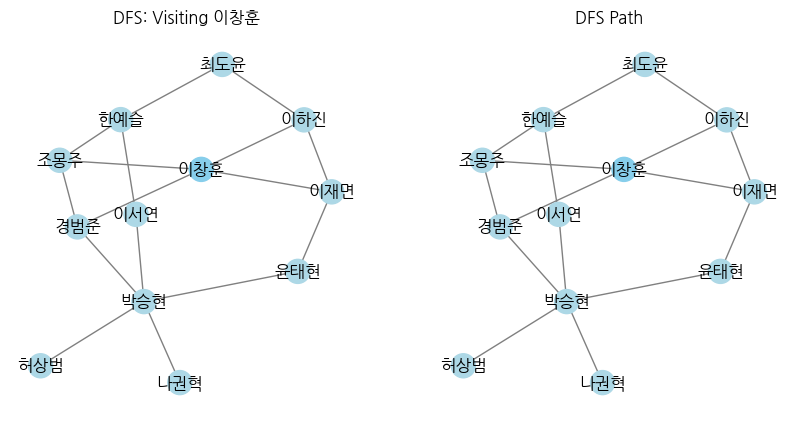

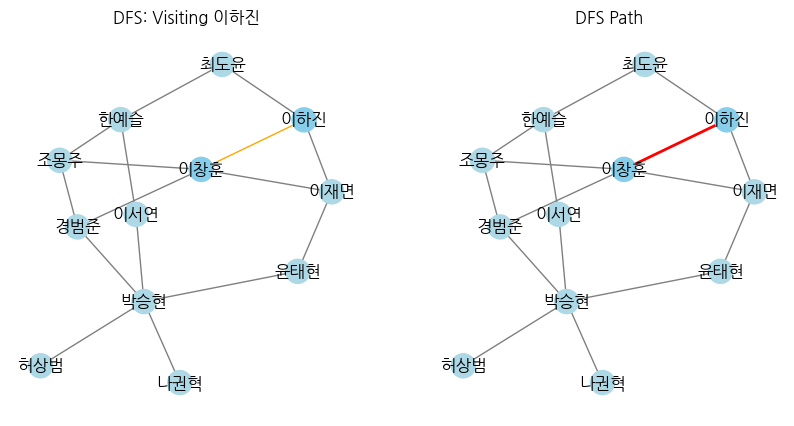

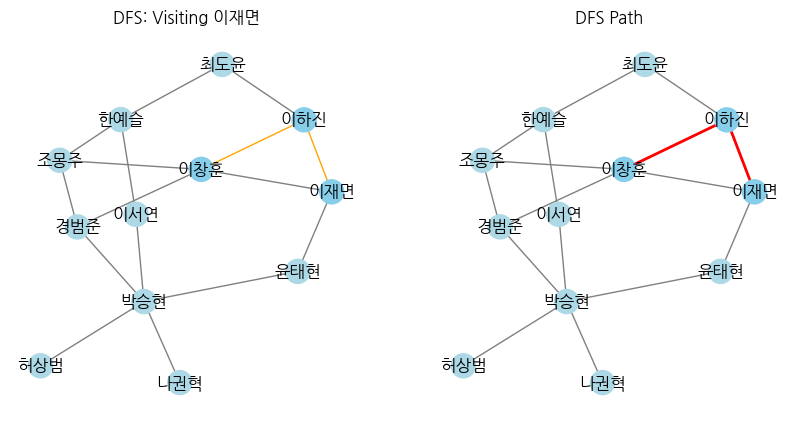

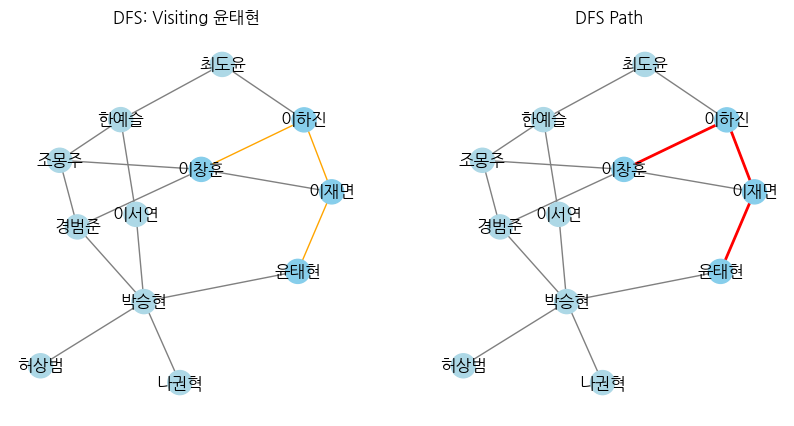

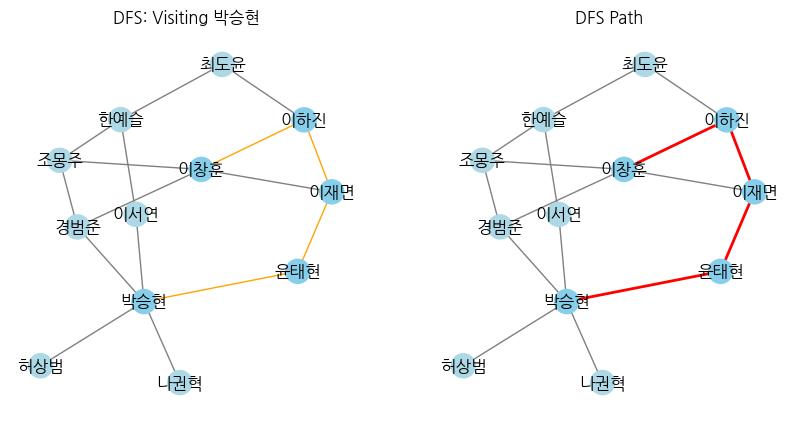

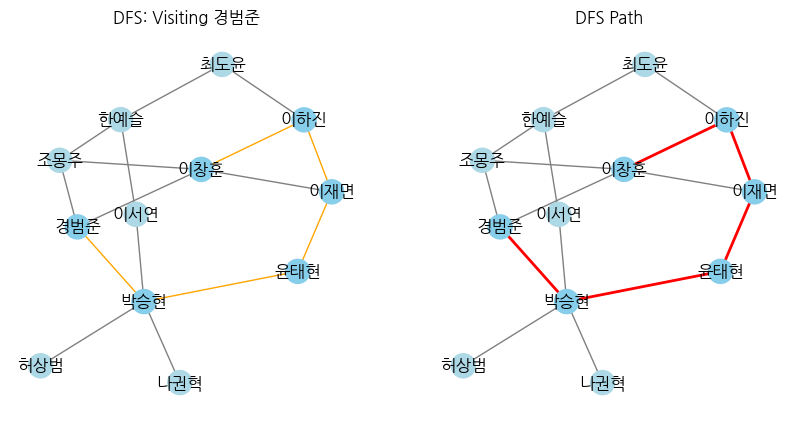

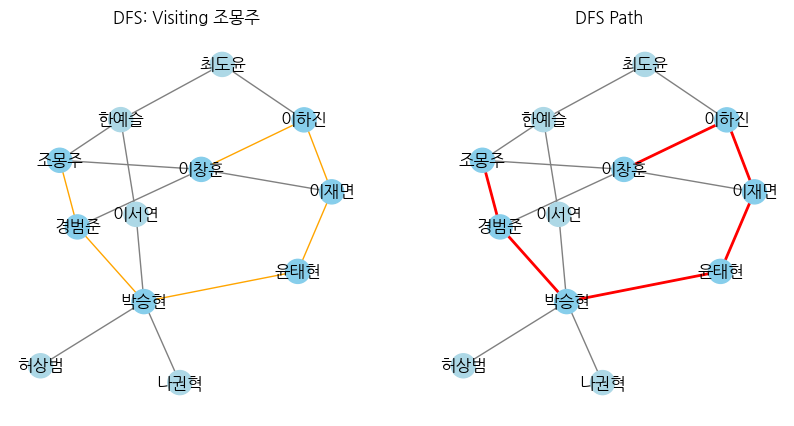

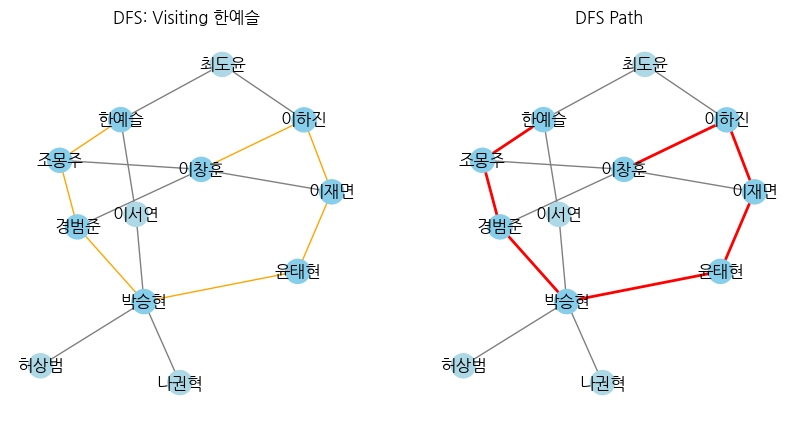

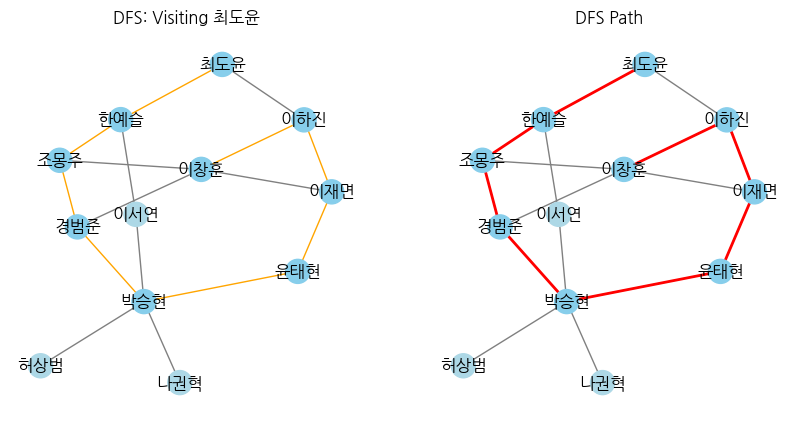

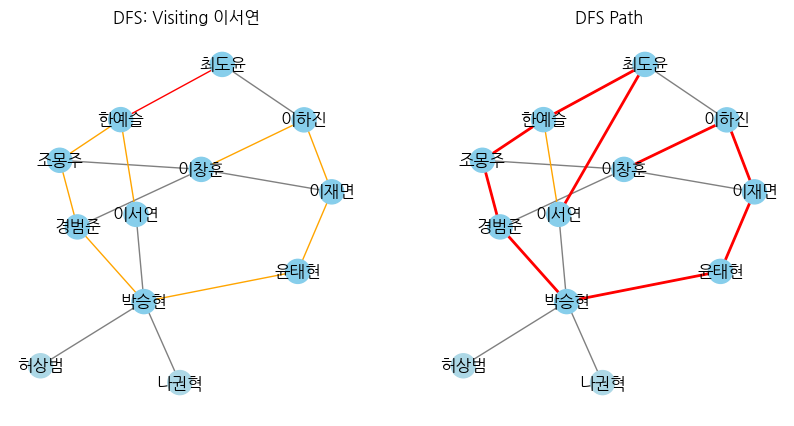

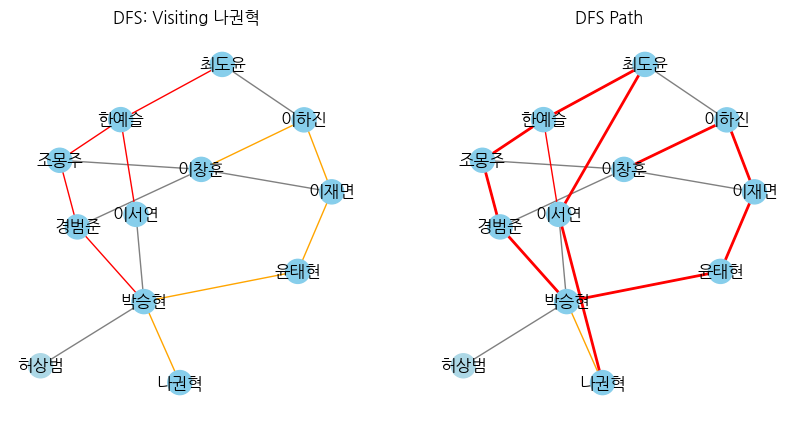

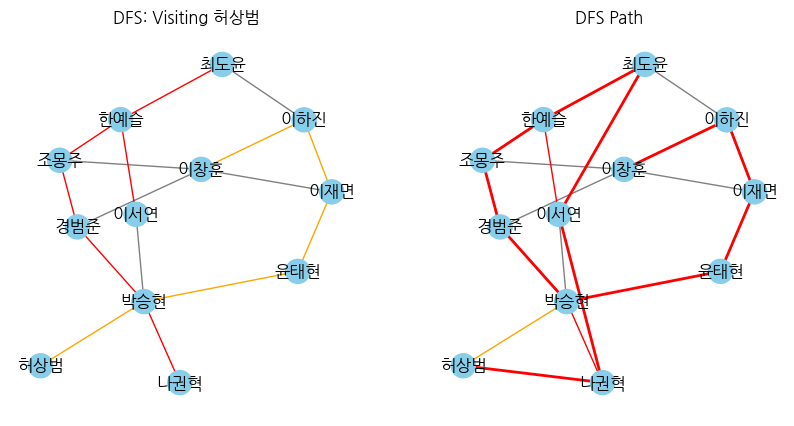

In [10]:
# DFS 시각화 함수
def visualize_dfs(graph, start_node, pos):
    visited = set()
    path = []
    edge_colors = {}

    def dfs_recursive(node):
        visited.add(node)
        path.append(node)

        # 현재 노드 색상 변경
        node_colors = ['skyblue' if n in visited else 'lightblue' for n in graph.nodes()]
        edge_colors_list = [edge_colors.get(tuple(sorted(e)), 'gray') for e in graph.edges()]

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
        plt.title(f"DFS: Visiting {node}")

        plt.subplot(1, 2, 2)
        nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
        plt.title("DFS Path")
        # 현재까지의 경로를 굵게 표시
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2.0)


        plt.show()

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                # 간선 색상 변경
                edge_colors[tuple(sorted((node, neighbor)))] = 'orange' # 탐색 중인 간선
                dfs_recursive(neighbor)
                edge_colors[tuple(sorted((node, neighbor)))] = 'red' # 탐색 완료 간선


    dfs_recursive(start_node)

# DFS 시각화 실행
print("DFS 시각화")
visualize_dfs(G, "이창훈", pos)


BFS 시각화


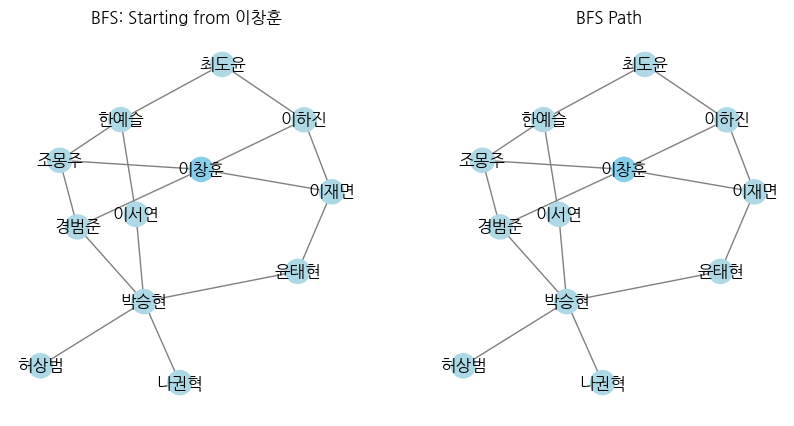

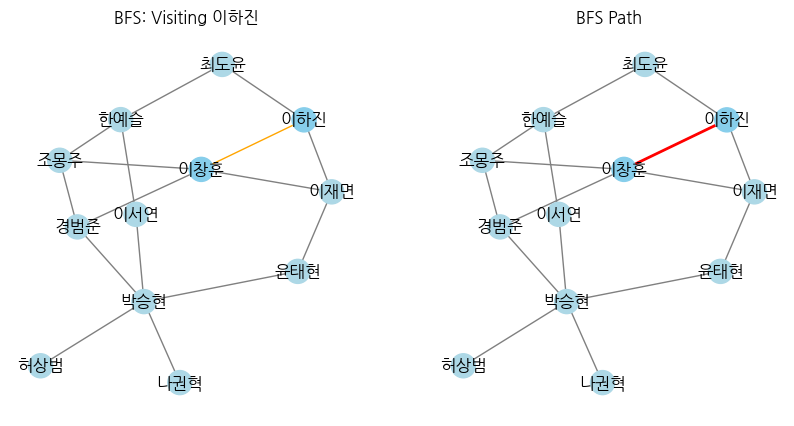

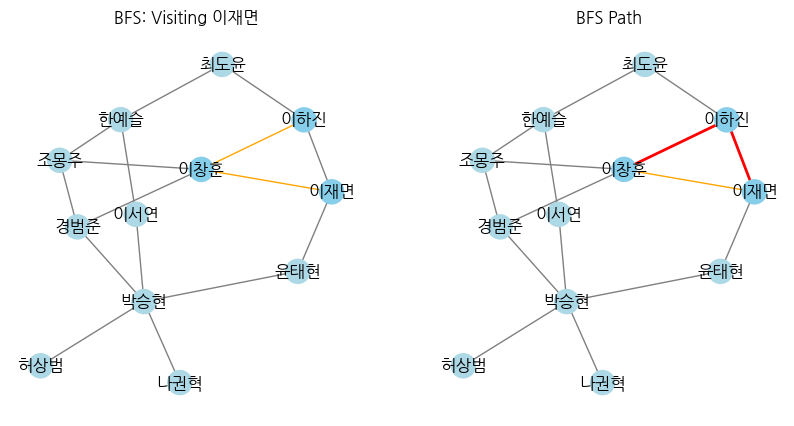

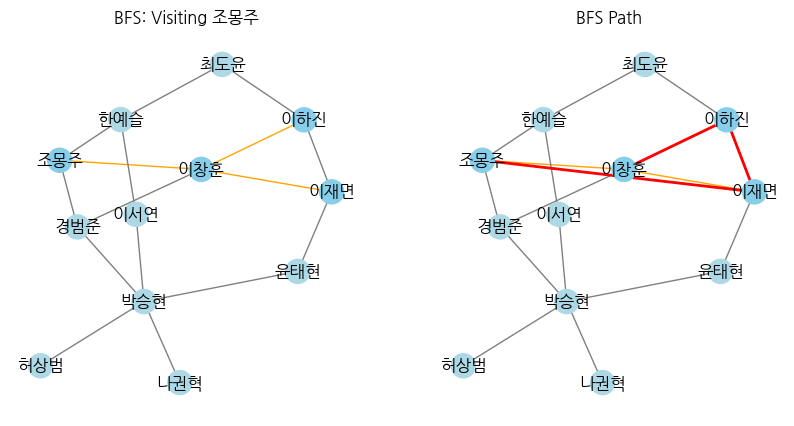

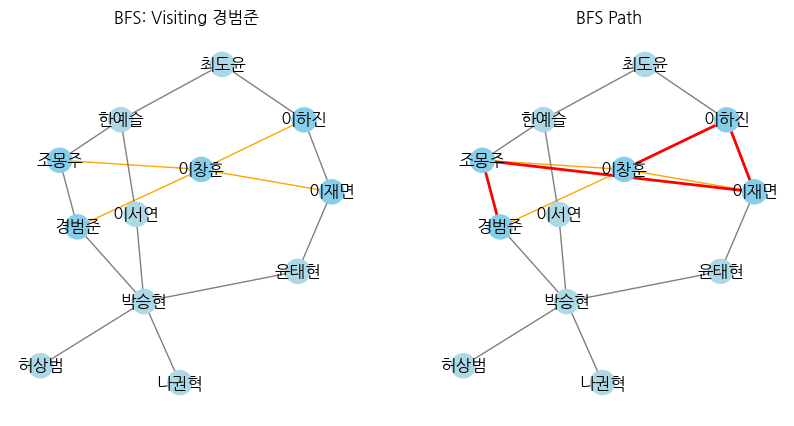

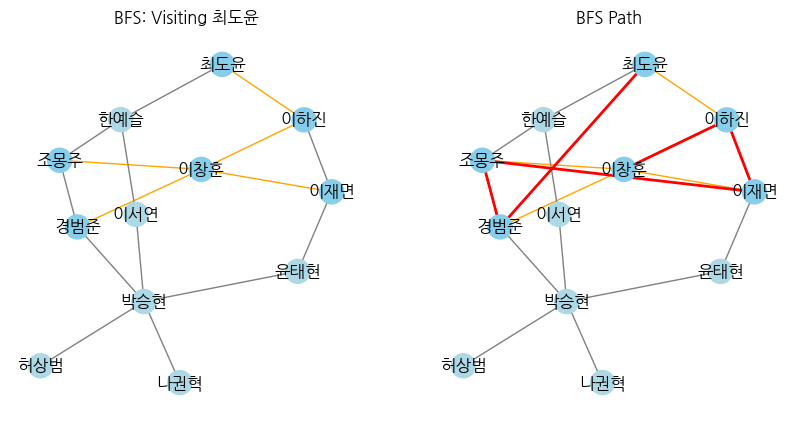

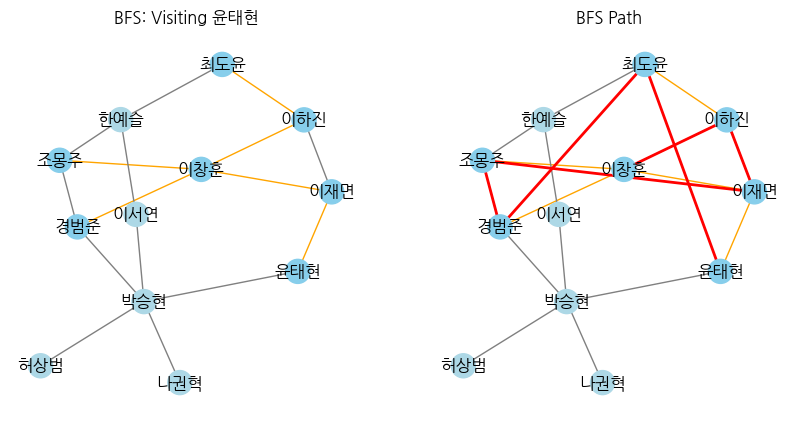

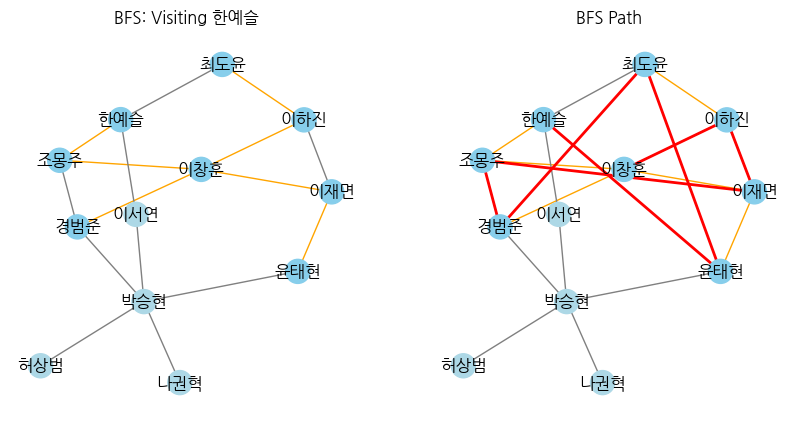

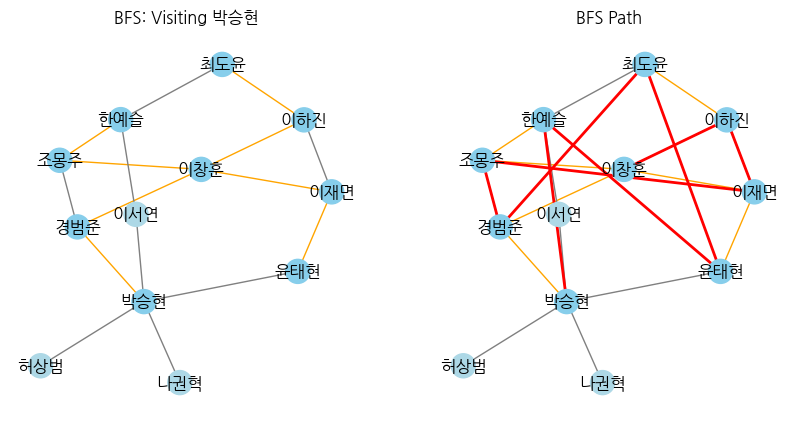

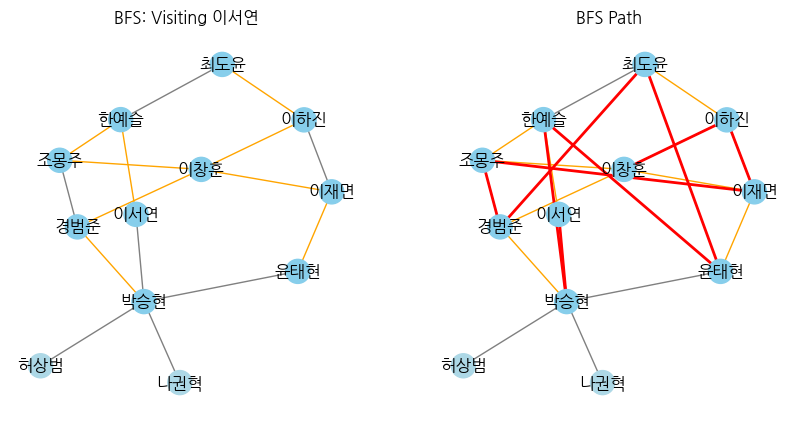

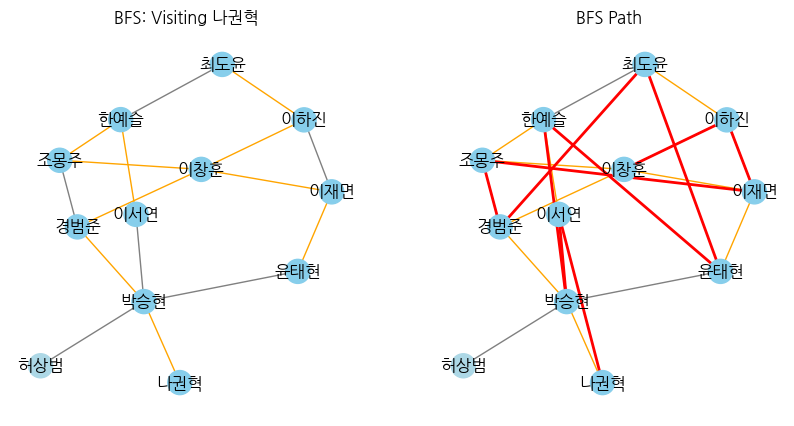

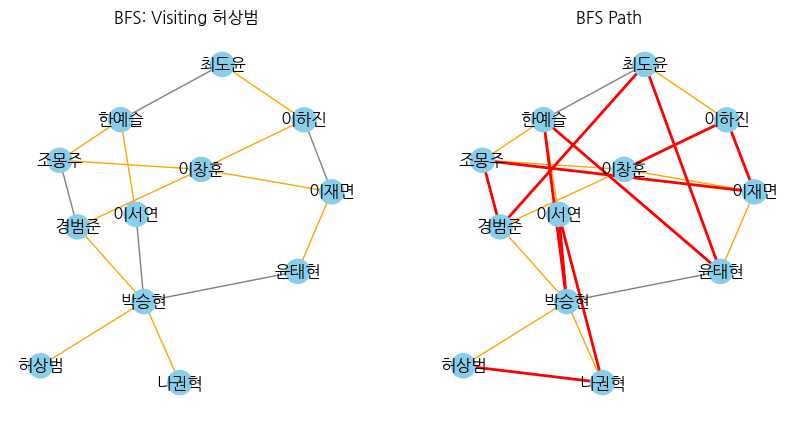

In [11]:
# BFS 시각화 함수
def visualize_bfs(graph, start_node, pos):
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)
    path = [start_node]
    edge_colors = {}

    # 초기 그래프 시각화
    node_colors = ['skyblue' if n in visited else 'lightblue' for n in graph.nodes()]
    edge_colors_list = [edge_colors.get(tuple(sorted(e)), 'gray') for e in graph.edges()]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
    plt.title(f"BFS: Starting from {start_node}")

    plt.subplot(1, 2, 2)
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
    plt.title("BFS Path")
    plt.show()


    while queue:
        v = queue.popleft()

        for neighbor in graph.neighbors(v):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                path.append(neighbor)
                # 간선 색상 변경
                edge_colors[tuple(sorted((v, neighbor)))] = 'orange' # 탐색 완료 간선


                # 현재 상태 시각화
                node_colors = ['skyblue' if n in visited else 'lightblue' for n in graph.nodes()]
                edge_colors_list = [edge_colors.get(tuple(sorted(e)), 'gray') for e in graph.edges()]

                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
                plt.title(f"BFS: Visiting {neighbor}")

                plt.subplot(1, 2, 2)
                nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors_list, font_family='NanumGothic')
                plt.title("BFS Path")
                # 현재까지의 경로를 굵게 표시
                path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
                nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2.0)
                plt.show()


# BFS 시각화 실행
print("\nBFS 시각화")
visualize_bfs(G, "이창훈", pos)

In [16]:
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import networkx as nx
import os
import random

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if not os.path.exists(font_path):
    raise FileNotFoundError("❌ 나눔고딕 폰트를 찾을 수 없습니다.")

fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# Define font properties object for explicit use
font_prop = fm.FontProperties(fname=font_path, size=10)


def infection_simulation(graph, patient_zero, max_depth):
    visited = {patient_zero: 0}  # 노드: 감염 단계(레벨)
    queue = deque([(patient_zero, 0)])
    while queue:
        current, depth = queue.popleft()
        if depth >= max_depth:
            continue
        for neighbor in graph.get(current, []):
            if neighbor not in visited:
                visited[neighbor] = depth + 1
                queue.append((neighbor, depth + 1))
    visited.pop(patient_zero)
    return visited


def print_infections_by_level(infected_dict):
    levels = {}
    for node, level in infected_dict.items():
        levels.setdefault(level, []).append(node)
    for level in sorted(levels.keys()):
        print(f"🔵 {level}단계 감염자 (거리 {level}): {', '.join(levels[level])}")


def plot_graph(graph, infected_nodes=None, patient_zero=None, title="Graph"):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    plt.figure(figsize=(10,7))
    pos = nx.spring_layout(G, seed=42)
    node_colors = []
    for node in G.nodes():
        if node == patient_zero:
            node_colors.append('red')
        elif infected_nodes and node in infected_nodes:
            node_colors.append('orange')
        else:
            node_colors.append('skyblue')

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800,
            font_size=10, font_weight='bold', edge_color='gray', font_family=font_name) # Use font_family here

    plt.title(title, fontsize=15, fontproperties=font_prop) # Use fontproperties for title
    plt.show()


# ============================
# 🧩 테스트케이스 하
# ============================
graph_small = {
    "이창훈" : ["이하진","이재면","조몽주","경범준"],
    "이하진" : ["이창훈","이재면","최도윤"],
    "이재면" : ["이창훈","이하진","윤태현"],
    "조몽주" : ["이창훈","경범준","한예슬"],
    "경범준" : ["이창훈","조몽주","박승현"],
    "최도윤" : ["이하진","한예슬"],
    "윤태현" : ["이재면","박승현"],
    "박승현" : ["경범준","나권혁","허상범","윤태현","이서연"],
    "한예슬" : ["조몽주","최도윤","이서연"],
    "이서연" : ["한예슬","박승현"],
    "나권혁" : ["박승현"],
    "허상범" : ["박승현"]
}

infected_small = infection_simulation(graph_small, '이창훈', max_depth=2)
print("\n✅ 테스트케이스 하 (2단계 이내 감염)")
print_infections_by_level(infected_small)


✅ 테스트케이스 하 (2단계 이내 감염)
🔵 1단계 감염자 (거리 1): 이하진, 이재면, 조몽주, 경범준
🔵 2단계 감염자 (거리 2): 최도윤, 윤태현, 한예슬, 박승현


In [12]:
import networkx as nx
from collections import deque

# 1. 그래프 생성
G = nx.Graph()

# 2. 노드 추가
nodes = ["박승현", "나권혁", "허상범"]
G.add_nodes_from(nodes)

# 3. 간선 추가 (친구 관계)
edges = [
    ("박승현", "나권혁"),
    ("나권혁", "허상범")
]
G.add_edges_from(edges)

# 4. 감염 시뮬레이션 함수 (2단계 BFS)
def infection_bfs(graph, start, max_depth=2):
    visited = set([start])
    queue = deque([(start, 0)])
    result = {0: [start], 1: [], 2: []}

    while queue:
        node, depth = queue.popleft()
        if depth == max_depth:
            continue

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                result[depth + 1].append(neighbor)
                queue.append((neighbor, depth + 1))

    return result

# 5. 감염 시작 노드
start_infected = "박승현"
result = infection_bfs(G, start_infected)

# 6. 결과 출력
print(f"감염 시작: {start_infected}")
for depth in range(1, 3):
    if result[depth]:
        print(f"{depth}단계 감염: {', '.join(result[depth])}")
    else:
        print(f"{depth}단계 감염: 없음")

감염 시작: 박승현
1단계 감염: 나권혁
2단계 감염: 허상범


In [ ]:
"""
prompt
이제 위에 것 과 유사하게 감염 시뮬레이터를 만들거야. 2단계 이내의 전염 경로를 추적,
그래프는 인접 리스트 형태로 구성해야 해. 감염자는 1명이고, 이름으로 지정해야 해.
2단계 이내로 연결된 노드들을 출력해, 단 감염자 자신은 제외.
출력 형식은 자유지만 감염 경로의 거리(레벨)은 함께 표시해줘 노드 개수는 1000개 내외, max depth 50으로 부탁해
실제 사람과 유사한 관계를 가지게 해줘
"""


In [ ]:
import random

# 노드 개수 정의
num_nodes = 1000

# 무방향 그래프 생성
G_large = nx.Graph()

# 노드 이름 추가
nodes = [f'Node_{i}' for i in range(num_nodes)]
G_large.add_nodes_from(nodes)

p = 0.02 # 엣지가 추가될 확률 (조절 가능)

for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if random.random() < p:
            G_large.add_edge(nodes[i], nodes[j])


# networkx 그래프를 인접 리스트 딕셔너리로 변환
large_graph_adj_list = {node: list(G_large.neighbors(node)) for node in G_large.nodes()}

# 노드 개수 출력 및 몇 가지 엔트리 확인
print(f"생성된 그래프의 노드 수: {len(large_graph_adj_list)} 개.")
print("샘플 인접 리스트 엔트리:")
for i, (node, neighbors) in enumerate(large_graph_adj_list.items()):
    if i < 1000:
        print(f"{node}: {neighbors}")
    else:
        break

생성된 그래프의 노드 수: 1000 개.
샘플 인접 리스트 엔트리:
Node_0: ['Node_20', 'Node_21', 'Node_30', 'Node_53', 'Node_71', 'Node_159', 'Node_214', 'Node_230', 'Node_259', 'Node_276', 'Node_280', 'Node_376', 'Node_388', 'Node_498', 'Node_533', 'Node_571', 'Node_627', 'Node_717', 'Node_754', 'Node_801', 'Node_936', 'Node_938', 'Node_947']
Node_1: ['Node_10', 'Node_67', 'Node_137', 'Node_157', 'Node_195', 'Node_215', 'Node_225', 'Node_244', 'Node_324', 'Node_366', 'Node_406', 'Node_538', 'Node_611', 'Node_696', 'Node_708', 'Node_786', 'Node_792', 'Node_816', 'Node_824', 'Node_830', 'Node_831', 'Node_939']
Node_2: ['Node_69', 'Node_86', 'Node_106', 'Node_122', 'Node_139', 'Node_147', 'Node_159', 'Node_249', 'Node_302', 'Node_440', 'Node_484', 'Node_486', 'Node_549', 'Node_605', 'Node_714', 'Node_800', 'Node_832', 'Node_930', 'Node_932', 'Node_938']
Node_3: ['Node_50', 'Node_119', 'Node_295', 'Node_517', 'Node_589', 'Node_661', 'Node_753', 'Node_845', 'Node_975']
Node_4: ['Node_55', 'Node_182', 'Node_199', 'Nod

In [ ]:
# 그래프 키에서 감염자로 지정할 노드 선택
infected_person = random.choice(list(large_graph_adj_list.keys()))

# 감염자의 이름 출력
print(f"감염자는 다음과 같습니다: {infected_person}")

감염자는 다음과 같습니다: Node_926


In [ ]:
from collections import deque

# 거리를 저장하기 위한 visited 딕셔너리 초기화
visited = {infected_person: 0}
queue = deque([(infected_person, 0)]) # 큐는 (노드, 거리)를 저장

infected_within_2_steps = {}

while queue:
    current_node, distance = queue.popleft()

    # 거리가 2를 초과하면 중지
    if distance > 2:
        continue

    # 2단계 이내이고 감염자 자신이 아니면 결과에 노드 추가
    if 0 < distance <= 2:
        infected_within_2_steps[current_node] = distance

    # 이웃 탐색
    if current_node in large_graph_adj_list:
        for neighbor in large_graph_adj_list[current_node]:
            if neighbor not in visited:
                visited[neighbor] = distance + 1
                queue.append((neighbor, distance + 1))

# 결과 출력
print("\n2단계 이내 감염된 노드 (감염자 제외):")
for node, dist in infected_within_2_steps.items():
    print(f"- {node} (거리: {dist})")


2단계 이내 감염된 노드 (감염자 제외):
- Node_16 (거리: 1)
- Node_23 (거리: 1)
- Node_39 (거리: 1)
- Node_108 (거리: 1)
- Node_119 (거리: 1)
- Node_126 (거리: 1)
- Node_128 (거리: 1)
- Node_237 (거리: 1)
- Node_249 (거리: 1)
- Node_354 (거리: 1)
- Node_456 (거리: 1)
- Node_466 (거리: 1)
- Node_485 (거리: 1)
- Node_596 (거리: 1)
- Node_703 (거리: 1)
- Node_728 (거리: 1)
- Node_738 (거리: 1)
- Node_746 (거리: 1)
- Node_759 (거리: 1)
- Node_792 (거리: 1)
- Node_865 (거리: 1)
- Node_921 (거리: 1)
- Node_88 (거리: 2)
- Node_103 (거리: 2)
- Node_186 (거리: 2)
- Node_225 (거리: 2)
- Node_283 (거리: 2)
- Node_289 (거리: 2)
- Node_333 (거리: 2)
- Node_410 (거리: 2)
- Node_437 (거리: 2)
- Node_467 (거리: 2)
- Node_521 (거리: 2)
- Node_601 (거리: 2)
- Node_644 (거리: 2)
- Node_663 (거리: 2)
- Node_700 (거리: 2)
- Node_708 (거리: 2)
- Node_755 (거리: 2)
- Node_793 (거리: 2)
- Node_821 (거리: 2)
- Node_866 (거리: 2)
- Node_874 (거리: 2)
- Node_880 (거리: 2)
- Node_994 (거리: 2)
- Node_19 (거리: 2)
- Node_30 (거리: 2)
- Node_50 (거리: 2)
- Node_68 (거리: 2)
- Node_89 (거리: 2)
- Node_172 (거리: 2)
- Node_197 (거리: